# Martial Arts

## KD Project Group 75

Martial arts have interesting rich histories behind them. They are one of the oldest sports. Historically, they have often been used in a military setting. However, nowadays they are mostly practiced recreationally.

Unlike other sports, martial arts can benefit many different groups of people. There is no one universal philosphy or goal that applies to all martial arts. Almost anyone can (and perhaps should) practice a martial art but it is of utmost importance to choose one that suits you and your personal goals and lifestyle best.

In [1]:
%load_ext ipython_sparql_pandas     
%matplotlib inline

import pandas as pd                    #pip install pandas
import matplotlib.pyplot as plt        #pip install matplotlib
import seaborn as sns                  #pip install seaborn
sns.set(style="darkgrid")

## Part 1

When choosing a martial art, it might be helpful to narrow down to a country of origin of the martial art. Say, Maria has just started learning Chinese. She would like to gain a deeper appreciation of the Chinese culture. She is only interested in Chinese martial arts. Additionally, she wants to know the type of techniques that these martial arts use. Which technique is most common among Chinese martial arts?

The query below obtains Chinese martial arts and their corresponding technical focus. Then we count how many Chinese martial arts fall under each of the technical focus categories.

In [2]:
%%sparql http://DESKTOP-TRJNVQU:7200/repositories/projectkd -s MartialArt
PREFIX ma: <http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
select ?Focus (count(*) as ?AmountOfMartialArts) where { 
    ?s rdf:type ma:ChineseMartialArt .
    ?s ma:primaryTechnicalFocus ?Focus
} group by ?Focus

,Focus,AmountOfMartialArts
0,http://www.semanticweb.org/guoda/ontologies/20...,3
1,http://www.semanticweb.org/guoda/ontologies/20...,14
2,http://www.semanticweb.org/guoda/ontologies/20...,4
3,http://www.semanticweb.org/guoda/ontologies/20...,4
4,http://www.semanticweb.org/guoda/ontologies/20...,2


<AxesSubplot:ylabel='AmountOfMartialArts'>

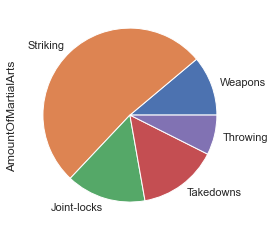

In [3]:
def lilFunc(name):
    return str(name).split("#")[-1]
MartialArt['Focus'] = MartialArt['Focus'].apply(lilFunc)
MartialArt.set_index('Focus', inplace=True)## Pandas

MartialArt['AmountOfMartialArts'].plot.pie()

The pie chart above displays that Striking is the most commonly used technique in Chinese martial arts.

## Part 2

Another factor to consider when choosing a martial art is its influence. For instance, Mario wants to start a martial art and it is important to him that the martial art he's choosing has been influential in the past. Accordingly, we could collect data, which shows how many martial arts have been derived from the parent martial art.

The query below extracts descendant martial arts of every martial art. Then it counts how many descendant martial arts there are.

In [4]:
%%sparql http://DESKTOP-TRJNVQU:7200/repositories/projectkd -q -s MartialArt
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX ma: <http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
select ?martialArt (count(?z) as ?descendants) where {
   ?s rdfs:label ?martialArt .
   ?s dbp:descendantArts ?z .
   ?s rdf:type ma:MartialArt
    
}  Group by ?martialArt order by ?descendants

<AxesSubplot:ylabel='martialArt'>

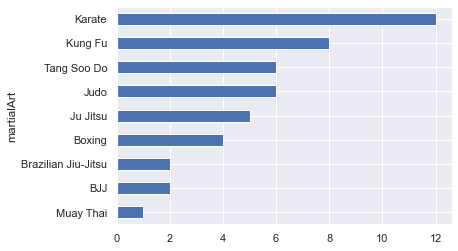

In [5]:
for index, row in MartialArt.iterrows():
    if (row['martialArt'].islower()):
        MartialArt.drop(index, inplace=True)
        

MartialArt.set_index('martialArt', inplace=True)## Pandas
MartialArt['descendants'].plot.barh()

The bar chart above shows that Mario should choose Karate. It is the most influential martial art.

## Part 3

Arron has a competitive spirit and would like to participate in the Olympics one day. Before he invests any time in practicing a martial art, he must know if his dream can be achieved one day. Hence, all of the martial arts that are not an Olympic sport must be filtered out. If a martial art is included in the Olympics, Arron wants to know more about its Olympic status, for exmaple, when it first became an Olympic sport.

The second criteria for Arron is the primary purpose of a martial art. He would like to know if a martial art focuses on spirituality, self-defence, or sports.

In [6]:
%%sparql http://DESKTOP-TRJNVQU:7200/repositories/projectkd -q -s MartialArt
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX ma: <http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#>
select distinct ?Name ?OlympicStatus ?Purpose where {
    ?z rdfs:label ?Name .
    ?z ma:primaryPurpose ?Purpose .
  SERVICE <https://dbpedia.org/sparql> {
     ?s dbp:olympic ?OlympicStatus .
     ?s rdfs:label ?Name .
     FILTER (str(?OlympicStatus)!="No") .
 }
} order by ?Name

In [39]:
# Styling: https://pandas.pydata.org/docs/user_guide/style.html
# Using CSS Hue-Saturation-Level colors: https://www.w3schools.com/colors/colors_hsl.asp
def lilFunc(name):
    return str(name).split("#")[-1]
MartialArt['Purpose'] = MartialArt['Purpose'].apply(lilFunc)
def purpose_color(purpose):
    colours = {"Self-defence":120, "Sport": 0}
    return f'background: hsl({colours.get(str(purpose).split("#")[-1], 230)}, 75%, 30%)' 

MartialArt.style \
    .applymap(purpose_color, subset=(slice(None), "Purpose"))

,Name,OlympicStatus,Purpose
0,Boxing,688,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
1,Boxing,1904,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
2,Boxing,688,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
3,Boxing,1904,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
4,Judo,* Accepted as an Olympic sport in 1960 * Contested since 1964 and 1992,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
5,Judo,* Accepted as an Olympic sport in 1960 * Contested since 1964 and 1992,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
6,Karate,Debuted in 2021,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
7,Karate,Will debut in 2021,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
8,Karate,Debuted in 2021,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
9,Karate,Will debut in 2021,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence


Arron should choose one of the martial arts displayed in the table above.

## Q4

The next step, after deciding on a martial art, is finding a place to practice it. Let's assume that we would like to practice a martial art somewhere in the Netherlands. The map below displays locations of facilities (sports clubs, gyms, etc.) that provide such a service. The circles indicating a facility are colour coded. The colours correspond to different martial arts.

In [43]:
%%sparql http://DESKTOP-TRJNVQU:7200/repositories/projectkd -q -s MartialArt
PREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>
PREFIX ma: <http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
select distinct ?Location ?Sport ?Lat ?Long where { 
    ?s ma:accomodatesSportType ?b .
    ?b rdf:type ma:MartialArt .
    ?b rdfs:label ?Sport .
    ?s rdfs:label ?Location .
	?s ma:hasX ?Long .
    ?s ma:hasY ?Lat
}  order by ?Sport

In [44]:
from pyproj import Proj, transform # pip install pyproj
import folium # pip install folium
# Extract latitude and longitude from coordinates in Well-Known Text (WKT) format
#capitals_coords = capitals.join(capitals.coords.str.extract('Point\((?P<lon>\S+) (?P<lat>\S+)\)').astype(float))
inProj = Proj('epsg:28992')
outProj = Proj('epsg:4326')

#coords = MartialArt.join(transform(inProj,outProj,MartialArt.p, MartialArt.o))
colours = {"Karate":"#3186cc", "Judo":"#e88133", "Tae Kwon Do": "#dd2fed", "Boxing":"#db124b"}

m = folium.Map(location=[52,5], zoom_start=8)
for _, row in MartialArt.iterrows():
    if (row['Sport'] in colours):
        currentColour = colours[row['Sport']]
    else:
        continue
    
    folium.CircleMarker(
        location=transform(inProj,outProj,row['Long'], row['Lat']),
        radius= 7,
        popup= row['Location'],
        color= currentColour,
        fill=True,
        fill_color=currentColour,
    ).add_to(m)

m

# x1,y1 = 115625,483736
# x2,y2 = transform(inProj,outProj,x1,y1)
# print (x2,y2)




/tmp/ipykernel_74993/652657969.py:19: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  location=transform(inProj,outProj,row['Long'], row['Lat']),
